In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
n = 100  # 데이터 포인트 수
ar_params = [0.7]  # 자기 회귀 계수
ma_params = []  # 이동평균 계수
residuals = np.random.normal(0, 1, n)  # 잔차 생성

# AR(1) 모델 생성
data = [0]  # 초기값 설정
for i in range(1, n):
    data.append(ar_params[0] * data[i-1] + residuals[i])

# 데이터 프레임 생성
df = pd.DataFrame({
    'Date': pd.date_range(start="2023-01-01", periods=n, freq='D'),
    'Value': data
})

print(df)

         Date     Value
0  2023-01-01  0.000000
1  2023-01-02  0.598476
2  2023-01-03  3.010803
3  2023-01-04  1.183447
4  2023-01-05  2.852000
..        ...       ...
95 2023-04-06 -0.751199
96 2023-04-07  0.014963
97 2023-04-08 -0.106204
98 2023-04-09 -0.357367
99 2023-04-10  0.896934

[100 rows x 2 columns]


In [8]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [9]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -155.336
Method:               Conditional MLE   S.D. of innovations              1.162
Date:                Thu, 01 Jun 2023   AIC                            316.671
Time:                        09:37:31   BIC                            324.457
Sample:                             1   HQIC                           319.821
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0431      0.117      0.368      0.713      -0.186       0.272
Value.L1       0.5877      0.082      7.209      0.000       0.428       0.747
                                    Roots           

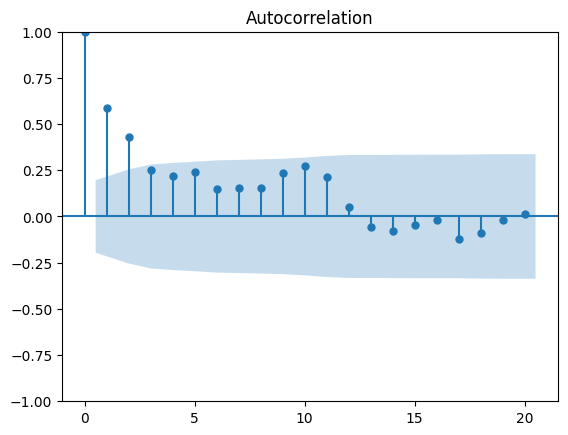

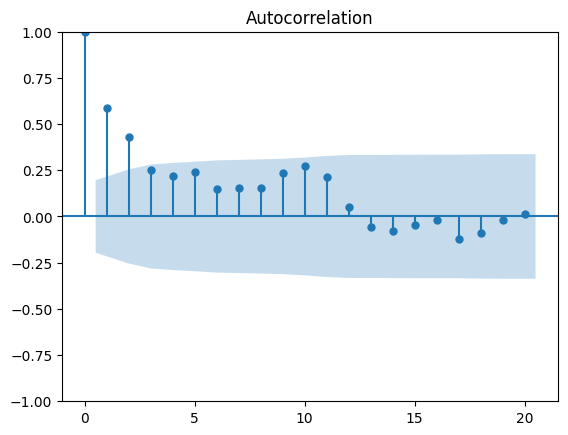

In [10]:
#AR(1) 모델 적합
model = AutoReg(df['Value'], lags=1)
results = model.fit()

#모델 정보 출력
print(results.summary())

#ACF 그래프 출력
plot_acf(df['Value'], lags=20)

In [11]:
n = 100
ma_params = [0.4, -0.2]  #이동평균 계수
residuals = np.random.normal(0, 1, n)  # 잔차 생성

#MA(2) 모델 생성
data = [0, 0]
for i in range(2, n) :
    data.append(ma_params[0] * residuals[i - 1] + ma_params[1] + residuals[i-2] + residuals[i])

df = pd.DataFrame({
    'Value' : data
})

print(df)

       Value
0   0.000000
1   0.000000
2  -0.071693
3  -0.619303
4  -0.379390
..       ...
95 -0.438263
96  1.092821
97  0.031341
98  1.785335
99 -3.094042

[100 rows x 1 columns]


In [12]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df['Value'], order=(0,0,2))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -153.321
Date:                Thu, 01 Jun 2023   AIC                            314.641
Time:                        09:37:32   BIC                            325.062
Sample:                             0   HQIC                           318.858
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3019      0.262     -1.153      0.249      -0.815       0.211
ma.L1          0.3318      3.922      0.085      0.933      -7.355       8.019
ma.L2          0.9999     23.667      0.042      0.9

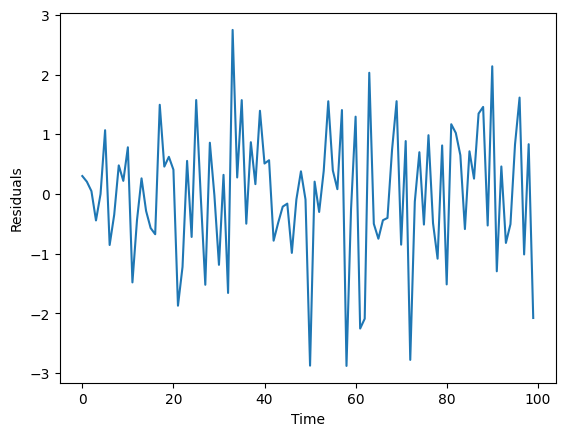

In [13]:
# 잔차 시계열 그래프 출력
plt.plot(results.resid)
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

## ARIMA 모델링 실습

       Value
0   0.000000
1   0.000000
2  -0.071693
3  -0.619303
4  -0.379390
..       ...
95 -0.438263
96  1.092821
97  0.031341
98  1.785335
99 -3.094042

[100 rows x 1 columns]
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -150.729
Date:                Thu, 01 Jun 2023   AIC                            311.458
Time:                        09:38:21   BIC                            324.484
Sample:                             0   HQIC                           316.730
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2889      0.2

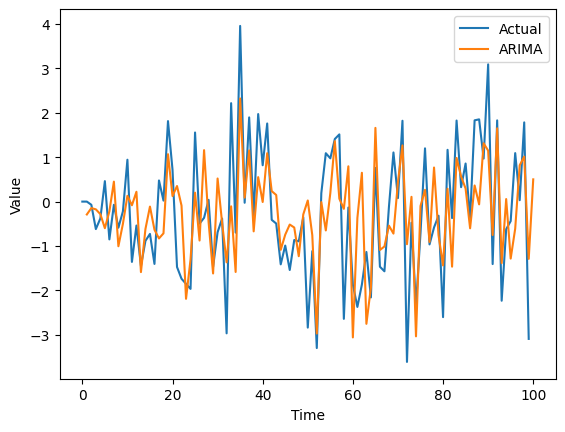

In [18]:
df = pd.DataFrame({ 'Value' : data})
print(df)

#ARIMA 모델 적합
model = ARIMA(df['Value'], order=(1, 0, 2))
results = model.fit()

#ARIMA 모델 정보 출력
print(results.summary())

#예측 결과 그래프 출력
pred = results.predict(start=1, end=n)
plt.plot(df['Value'], label='Actual')
plt.plot(pred, label='ARIMA')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### AIC를 사용하여 ARIMA 모델의 차수를 선택

In [19]:
#시계열 데이터 생성
np.random.seed(0)
n = 100  #데이터 포인트 수
data = np.random.normal(0, 1, n)
print(data)

#ARIMA 모델 선택을 위한 AIC계산
best_aic = np.inf
best_order = None

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0

In [20]:
#모델의 차수 탐색
for p in range(3) :
    for d in range(2) :
        for q in range(3) : 
            order = (p, d, q)
            try :
                model = ARIMA(data, order=order)
                results = model.fit()
                aic = results.aic
                if aic < best_aic :
                    best_aic = aic
                    best_order = order
            except:
                continue

#최적 모델 출력
print("Best AIC:", best_aic)
print("Best Order:", best_order)

Best AIC: 286.10561452042487
Best Order: (0, 1, 1)


/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### BIC를 사용하여 ARIMA 모델 차수 선택

In [23]:
#시계열 데이터 생성
np.random.seed(0)
n = 100  #데이터 포인트 수
data = np.random.normal(0, 1, n)

#최적의 BIC, order 초기화
best_bic = np.inf
best_order = None

In [24]:
#모델의 차수 탐색
for p in range(3) :
    for d in range(2) :
        for q in range(3) : 
            order = (p, d, q)
            try :
                model = ARIMA(data, order=order)
                results = model.fit()
                bic = results.bic
                if bic < best_bic :
                    best_bic = bic
                    best_order = order
            except:
                continue

#최적 모델 출력
print("Best BIC:", best_bic)
print("Best Order:", best_order)

Best BIC: 291.295854220694
Best Order: (0, 1, 1)


/Users/sang-yun/anaconda3/envs/AI/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
